### Fashion MNIST ###

In [94]:
import pandas as pd

In [95]:
fashion_mnist = pd.read_csv("fashion-mnist_train.csv")
fashion_mnist.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0


In [96]:
class_table = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

def GetImage(fashion_mnist, i, is2d=True):
    if is2d:
        return np.reshape(fashion_mnist[fashion_mnist.columns[1:]].iloc[i].values/255, (28,28))
    else:
        return np.reshape(fashion_mnist[fashion_mnist.columns[1:]].iloc[i].values/255, (784))

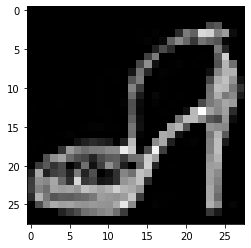

In [97]:
import matplotlib.pyplot as plt
import numpy as np

sample = GetImage(fashion_mnist, 30)
plt.figure()
plt.imshow(sample, 'gray')

In [98]:
try:
    fashion_mnist = pd.read_pickle("./fashion_mnist_with_image_column.pkl")
except:
    arr = []

    for i in range(0, len(fashion_mnist.index)):
        image = GetImage(fashion_mnist, i, is2d=False)
        arr.append( image )

        if i%100 == 0:
            print("{}/{}".format(i, len(fashion_mnist.index)))

    fashion_mnist['image'] = arr

    fashion_mnist.to_pickle("./fashion_mnist_with_image_column.pkl")

    fashion_mnist.head(3)

In [99]:
image_arr = []

for i in range(0, len(fashion_mnist.index)):
    image_arr.append( fashion_mnist.iloc[i]['image'] )
    if i%100 == 0:
        print("{}/{}".format(i, len(fashion_mnist.index)))

0/60000
100/60000
200/60000
300/60000
400/60000
500/60000
600/60000
700/60000
800/60000
900/60000
1000/60000
1100/60000
1200/60000
1300/60000
1400/60000
1500/60000
1600/60000
1700/60000
1800/60000
1900/60000
2000/60000
2100/60000
2200/60000
2300/60000
2400/60000
2500/60000
2600/60000
2700/60000
2800/60000
2900/60000
3000/60000
3100/60000
3200/60000
3300/60000
3400/60000
3500/60000
3600/60000
3700/60000
3800/60000
3900/60000
4000/60000
4100/60000
4200/60000
4300/60000
4400/60000
4500/60000
4600/60000
4700/60000
4800/60000
4900/60000
5000/60000
5100/60000
5200/60000
5300/60000
5400/60000
5500/60000
5600/60000
5700/60000
5800/60000
5900/60000
6000/60000
6100/60000
6200/60000
6300/60000
6400/60000
6500/60000
6600/60000
6700/60000
6800/60000
6900/60000
7000/60000
7100/60000
7200/60000
7300/60000
7400/60000
7500/60000
7600/60000
7700/60000
7800/60000
7900/60000
8000/60000
8100/60000
8200/60000
8300/60000
8400/60000
8500/60000
8600/60000
8700/60000
8800/60000
8900/60000
9000/60000
9100/60000


## Analyzing Feature Importance ##
Using Random Forest.

In [100]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from matplotlib.colors import ListedColormap

rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(image_arr, np.array(fashion_mnist['label'].values, dtype=np.float64))

RandomForestClassifier(n_estimators=500, n_jobs=-1)

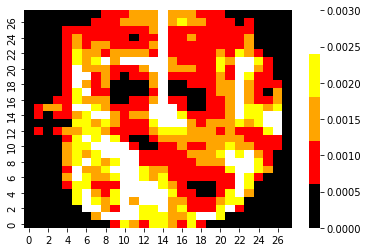

In [101]:
sns.heatmap(rnd_clf.feature_importances_.reshape((28,28)), vmin=0, vmax=0.003, cmap=ListedColormap(['black', 'red', 'orange', 'yellow', 'white']))
plt.xlim(0, 28)
plt.ylim(0, 28)
plt.show()

### PCA ###

In [102]:
feature_df = pd.DataFrame(np.array(image_arr))
feature_df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.000000,0.000000,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.000000,0.000000,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.286275,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.627451,0.635294,0.639216,0.529412,0.368627,0.000000,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


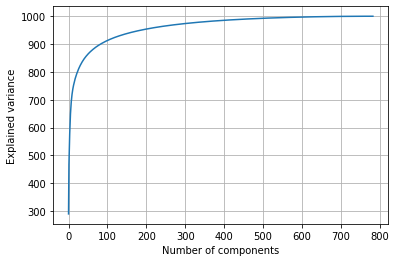

In [103]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca_784 = PCA(n_components=784)
pca_784.fit(feature_df)

plt.grid()
plt.plot(np.cumsum(pca_784.explained_variance_ratio_ * 1000))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('Scree plot.png')

In [104]:
pca_200 = PCA(n_components=200)
pca_200.fit(feature_df)

np.cumsum(pca_200.explained_variance_ratio_ * 100)[-1]

95.31538895766735

In [105]:
pca_300 = PCA(n_components=300)
pca_300.fit(feature_df)

np.cumsum(pca_300.explained_variance_ratio_ * 100)[-1]

97.32519975822305

We will choose 200.

In [106]:
transformed_x = pca_200.fit_transform(image_arr)

### Models ###

In [107]:
from sklearn.model_selection import cross_val_score

x, y = image_arr, np.array(fashion_mnist['label'].values)

def Test(name, model, new_x=x, new_y=y, new_cv=30, print_flag=True, return_flag=False):
    score = abs(np.median( cross_val_score(model, new_x, new_y, cv=new_cv, scoring='accuracy') ))
    if print_flag:
        print('{}: {}'.format(name, score))
    if return_flag:
        return score

In [86]:
from sklearn.dummy import DummyClassifier
Test('Dummy (stratified)', DummyClassifier(strategy="stratified"))
Test('Dummy (most_frequent)', DummyClassifier(strategy="most_frequent"))

Dummy (stratified): 0.102
Dummy (most_frequent): 0.1


In [91]:
from sklearn.linear_model import LogisticRegression
Test('Logistic Regression', LogisticRegression())

Logistic Regression: 0.855


In [90]:
from sklearn.ensemble import RandomForestClassifier
Test('Random Forest', RandomForestClassifier(), new_x=transformed_x)

Random Forest: 0.88475


In [88]:
from xgboost import XGBClassifier
Test('XGBoost', XGBClassifier(), new_x=transformed_x)

XGBoost: 0.8625


In [30]:
from sklearn.ensemble import AdaBoostClassifier
Test('AdaBoost', AdaBoostClassifier(), new_x=transformed_x)

AdaBoost: 0.52275


In [29]:
from sklearn.neighbors import KNeighborsClassifier

best_score = (0,0)
for k in range(1, 21):
    score = Test('KNN', KNeighborsClassifier(n_neighbors=k), new_x=transformed_x, print_flag=False, return_flag=True)
    if score > best_score[1]:
        best_score = (k, score)

print('KNN (best k {}): {}'.format(best_score[0], best_score[1]))

KNN (best k 3): 0.86775


In [24]:
from sklearn.svm import SVC
Test('SVC', SVC(), new_x=transformed_x)

SVC: 0.89525


In [23]:
from sklearn.naive_bayes import GaussianNB
Test('GaussianNB', GaussianNB(), new_x=transformed_x)

GaussianNB: 0.74325


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

estimators = [  ("logistic", LogisticRegression()),
                ("RandomForest", RandomForestClassifier()),
                ("svc", SVC()),
                ("XGB",XGBClassifier()),
                ("KNN",KNeighborsClassifier())]

ensemble = VotingClassifier(estimators)

Test("HardVoting",ensemble, new_x=transformed_x, new_cv=4)

HardVoting: 0.8870333333333333


Dummy (stratified): 0.102 <br>
Dummy (most_frequent): 0.1 <br>
<br>
Logistic Regression: 0.855 <br>
Random Forest: 0.88475 <br>
XGBoost: 0.8625 <br>
AdaBoost: 0.52275 <br>
KNN (best k 3): 0.86775 <br>
SVC: 0.89525 <br>
GaussianNB: 0.74325 <br>
HardVoting: 0.8870333333333333

## Final Test ##

In [109]:
fashion_mnist_test = pd.read_csv("fashion-mnist_test.csv")

try:
    fashion_mnist_test = pd.read_pickle("./TEST_fashion_mnist_with_image_column.pkl")
except:
    arr = []

    for i in range(0, len(fashion_mnist_test.index)):
        image = GetImage(fashion_mnist_test, i, is2d=False)
        arr.append( image )

        if i%100 == 0:
            print("{}/{}".format(i, len(fashion_mnist_test.index)))

    fashion_mnist_test['image'] = arr

    fashion_mnist_test.to_pickle("./fashion_mnist_with_image_column.pkl")

    fashion_mnist_test.head(3)

image_arr_test = []

for i in range(0, len(fashion_mnist_test.index)):
    image_arr_test.append( fashion_mnist_test.iloc[i]['image'] )
    if i%100 == 0:
        print("{}/{}".format(i, len(fashion_mnist_test.index)))

0/10000
100/10000
200/10000
300/10000
400/10000
500/10000
600/10000
700/10000
800/10000
900/10000
1000/10000
1100/10000
1200/10000
1300/10000
1400/10000
1500/10000
1600/10000
1700/10000
1800/10000
1900/10000
2000/10000
2100/10000
2200/10000
2300/10000
2400/10000
2500/10000
2600/10000
2700/10000
2800/10000
2900/10000
3000/10000
3100/10000
3200/10000
3300/10000
3400/10000
3500/10000
3600/10000
3700/10000
3800/10000
3900/10000
4000/10000
4100/10000
4200/10000
4300/10000
4400/10000
4500/10000
4600/10000
4700/10000
4800/10000
4900/10000
5000/10000
5100/10000
5200/10000
5300/10000
5400/10000
5500/10000
5600/10000
5700/10000
5800/10000
5900/10000
6000/10000
6100/10000
6200/10000
6300/10000
6400/10000
6500/10000
6600/10000
6700/10000
6800/10000
6900/10000
7000/10000
7100/10000
7200/10000
7300/10000
7400/10000
7500/10000
7600/10000
7700/10000
7800/10000
7900/10000
8000/10000
8100/10000
8200/10000
8300/10000
8400/10000
8500/10000
8600/10000
8700/10000
8800/10000
8900/10000
9000/10000
9100/10000


In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

estimators = [  ("logistic", LogisticRegression()),
                ("RandomForest", RandomForestClassifier()),
                ("svc", SVC()),
                ("XGB",XGBClassifier()),
                ("KNN",KNeighborsClassifier())]

ensemble = VotingClassifier(estimators)

ensemble.fit(image_arr, np.array(fashion_mnist['label'].values, dtype=np.float64))

c:\Users\royha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('RandomForest', RandomForestClassifier()),
                             ('svc', SVC()),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_po...
                                            importance_type=None,
                                            interaction_constraints=None,
                   

In [111]:
ensemble.score(image_arr_test, np.array(fashion_mnist_test['label'].values, dtype=np.float64))

0.8986

Final Score 0.8986